In [5]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel("D:\Copper modling\Copper_Set.xlsx")



In [7]:

for i in df.columns:
  print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [8]:
df.shape

(181673, 14)

In [9]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(181673, 14)

In [14]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [15]:
df['material_ref'] = df['material_ref'].replace(r'^00000.*$', None, regex=True)


In [16]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [17]:
# Impute numeric columns with mean or median
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mean())
df['thickness'] = df['thickness'].fillna(df['thickness'].median())
df['quantity tons'] = df['quantity tons'].fillna(0)




# Impute categorical columns with mode

df['customer'] = df['customer'].fillna(df['customer'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['application'] = df['application'].fillna(df['application'].mode()[0])

# Drop 'material_ref' column if it has too many missing values
df = df.drop(columns=['material_ref'])




In [18]:
df.isna().sum()

id               2
item_date        1
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    1
selling_price    0
dtype: int64

In [19]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [20]:
#df.dropna(subset=['item_date', 'delivery date'], inplace=True)



In [21]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [22]:
df["quantity tons"] = pd.to_numeric(df["quantity tons"], errors='coerce') 



In [23]:
# Convert `item_date` to a datetime type and extract the year and month
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')



In [24]:
df['item_date'] = df['item_date'].fillna(df['item_date'].mean())
df['delivery date'] = df['delivery date'].fillna(df['delivery date'].mean())
df['quantity tons'] = df['quantity tons'].fillna(0)

In [25]:

df['lead_time'] = (df['delivery date'] - df['item_date']).dt.days



In [26]:
# Assume 'lead_time' is the column with lead time values
df['lead_time'] = df['delivery date'] - df['item_date']

# If negative lead times are errors, set them to NaN
#df.loc[df['lead_time'] < pd.Timedelta(0), 'lead_time'] = pd.NaT

# Alternatively, if you want to set negative lead times to zero


# Or remove rows with negative lead times
# df = df[df['lead_time'] >= pd.Timedelta(0)]


In [27]:
df.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
lead_time        0
dtype: int64

In [28]:
df.shape

(181673, 14)

In [29]:
df.dropna(subset=['item_date', 'delivery date', 'quantity tons', 'lead_time','customer'], inplace=True)



In [30]:
df['lead_time'] = df['lead_time'].dt.days


In [31]:
# Count rows where lead_time is 0
zero_lead_time_count = (df['lead_time'] == 0).sum()
zero_lead_time_count


np.int64(460)

In [32]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,lead_time
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,-90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,-90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,-1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,-1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,-1
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,-1


## outliers

In [33]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,lead_time
count,181673,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673,1.816730e+05,181673.000000
mean,2020-11-26 22:56:58.127374080,5.874893e+03,3.051221e+07,44.898125,25.613746,2.564822,1295.286724,4.739679e+08,2021-01-25 22:44:26.223372288,1.918036e+03,59.991281
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03,-689.000000
25%,2020-09-29 00:00:00,1.097007e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02,28.000000
50%,2020-11-30 00:00:00,3.036428e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02,59.000000
75%,2021-02-03 00:00:00,6.716038e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02,97.000000
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08,448.000000
std,NaN,2.349075e+06,2.433375e+07,24.405794,17.753909,6.572303,261.631754,7.175101e+08,NaN,3.317947e+05,46.814439


In [34]:
del df["item_date"]
del df["id"]
del df["customer"]
del df["delivery date"]
#del df["product_ref"]

In [35]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)

In [36]:
df['quantity tons'].unique()

array([ 54.15113862, 768.0248392 , 386.12794891, ..., 208.08646861,
         4.23559357, 406.68653838])

In [37]:
df.isna().sum()

quantity tons    5
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
lead_time        0
dtype: int64

In [38]:
df

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time
0,54.151139,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91
1,768.024839,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0
2,386.127949,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,-90
3,202.411065,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,-90
4,785.526262,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,-31
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,-1
181669,208.086469,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,-1
181670,4.235594,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,-1
181671,NaN,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,-1


In [39]:
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)

C:\Users\SUBBULASKSHMI S\AppData\Local\Temp\ipykernel_7516\1785227444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)


In [40]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    

In [41]:
outlier(df, "quantity tons")
outlier(df, "selling_price")
outlier(df, "thickness")
outlier(df, "width")


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    sns.boxplot(y=df)
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    # Create a boxplot for the specified column
    sns.boxplot(y=df[column])

    # Set the title for the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

    # Show the plot
    plt.show()


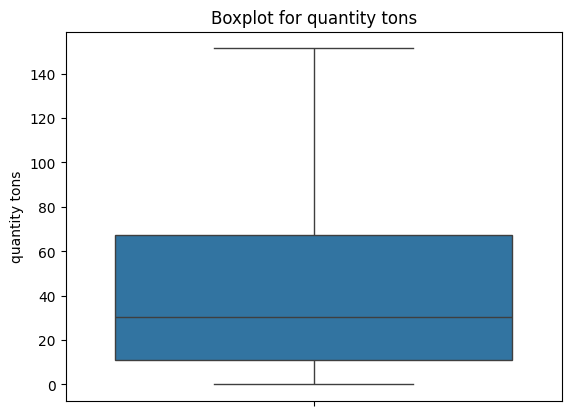

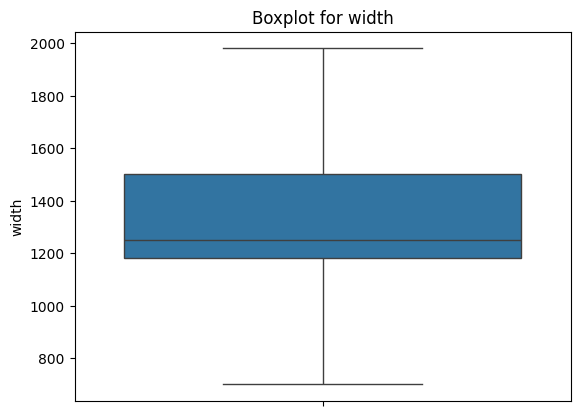

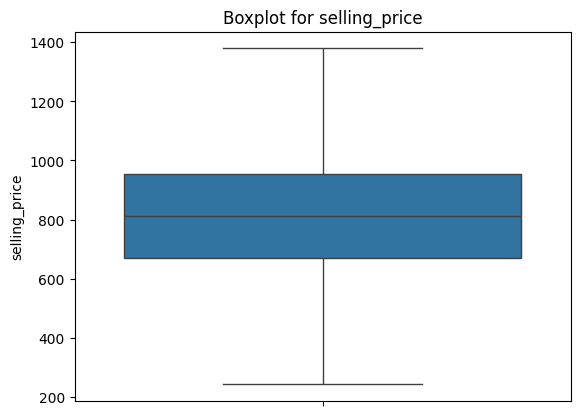

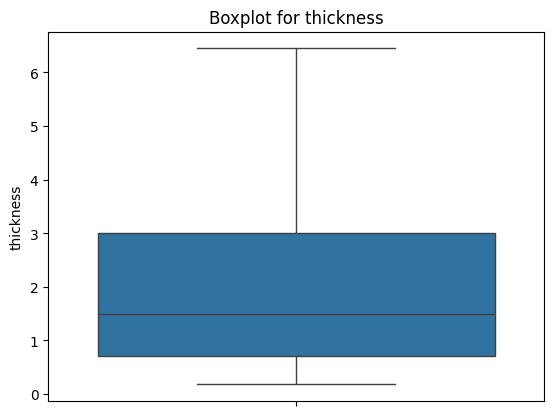

In [43]:
box(df, "quantity tons")
box(df, 'width')  # For example, to plot the boxplot of 'quantity tons'
box(df, 'selling_price')
box(df, "thickness")

In [44]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [45]:
mean_status = df.groupby("status")["selling_price"].mean().sort_values()
mean_status 


status
Draft               243.000000
Lost                806.030373
Won                 829.242661
Not lost for AM     842.399250
Revised             854.116214
To be approved      928.547173
Offerable           951.000000
Offered            1017.358491
Wonderful          1136.000000
Name: selling_price, dtype: float64

In [46]:
df['status'] = df['status'].map({'Lost':1, 'Won':2, 'Draft':0, 'To be approved':5, 'Not lost for AM':3,
                                 'Wonderful':8, 'Revised':4, 'Offered':6, 'Offerable':7})

In [47]:
mean_item_ref = df.groupby("item type")["selling_price"].mean().sort_values()
mean_item_ref



item type
WI         692.460859
PL         720.393267
Others     764.004197
IPL        778.907407
S          803.882680
W          835.242324
SLAWR     1195.000000
Name: selling_price, dtype: float64

In [48]:
df['item type']=df['item type'].map({'WI':0, 'PL':1, 'Others':2, 'IPL':3, 'S':4,
                                 'W':5, 'SLAWR':6})

In [49]:
mean_country = df.groupby("country")["selling_price"].mean().sort_values()
mean_country


country
89.0      656.706522
40.0      700.108140
80.0      722.648352
79.0      758.508720
39.0      767.198606
77.0      768.417368
78.0      801.968075
26.0      809.069624
27.0      821.679987
28.0      827.973739
32.0      833.491895
25.0      836.525449
107.0     847.600000
30.0      850.767676
84.0      859.060792
38.0      870.921145
113.0    1124.245098
Name: selling_price, dtype: float64

In [50]:
df['country_encoded'] = df['country'].map({
    89.0: 0,
    40.0: 1,
    80.0: 2,
    79.0: 3,
    39.0: 4,
    77.0: 5,
    78.0: 6,
    26.0: 7,
    27.0: 8,
    28.0: 9,
    32.0: 10,
    25.0: 11,
    107.0: 12,
    30.0: 13,
    84.0: 14,
    38.0: 15,
    113.0: 16
})


In [51]:
mean_application = df.groupby("application")["selling_price"].mean().sort_values()
mean_application

application
58.0     598.266219
68.0     604.729282
59.0     711.155600
56.0     717.966385
28.0     726.369290
69.0     735.721311
22.0     747.305445
25.0     752.237877
15.0     755.518811
4.0      756.181818
40.0     762.147843
3.0      778.499239
66.0     780.062674
20.0     785.134427
39.0     788.921348
10.0     790.964161
5.0      795.754182
26.0     799.678788
27.0     804.836603
67.0     808.040724
19.0     830.118881
29.0     841.753758
2.0      844.500000
65.0     858.615385
70.0     860.588235
79.0     888.035035
42.0     898.745935
41.0     926.173737
38.0     935.072407
99.0    1087.691781
Name: selling_price, dtype: float64

In [52]:
df['application_encoded'] = df['application'].map({
    58.0: 0,
    68.0: 1,
    59.0: 2,
    56.0: 3,
    28.0: 4,
    69.0: 5,
    22.0: 6,
    25.0: 7,
    4.0: 8,
    15.0: 9,
    40.0: 10,
    3.0: 11,
    66.0: 12,
    20.0: 13,
    39.0: 14,
    10.0: 15,
    5.0: 16,
    26.0: 17,
    27.0: 18,
    67.0: 19,
    19.0: 20,
    29.0: 21,
    2.0: 22,
    65.0: 23,
    70.0: 24,
    79.0: 25,
    42.0: 26,
    41.0: 27,
    38.0: 28,
    99.0: 29
}
)

In [53]:
mean_product_ref = df.groupby("product_ref")["selling_price"].mean().sort_values()
mean_product_ref


product_ref
640665         678.562704
1721130331     701.136187
1693867563     713.126280
1671876026     719.866294
1670798778     729.499199
1665584662     731.000000
628377         740.282369
640405         741.668634
1671863738     757.971389
640400         763.643373
929423819      785.000000
164141591      788.337089
1690738206     798.095238
628117         804.647613
1693867550     806.071408
1332077137     807.137266
628112         812.307345
1722207579     816.264000
164336407      824.306122
164337175      830.944870
1668701725     835.719643
1282007633     845.366548
1668701376     851.241176
1665572374     878.752475
1668701718     881.059291
1690738219     886.842105
1668701698     904.410642
1665572032     908.800000
1665584320     923.833333
1665584642     928.500000
611993         995.371107
611733         996.288889
611728        1325.337838
Name: selling_price, dtype: float64

In [54]:
df['product_ref_encode'] = df['product_ref'].map({
    640665: 0,
    1721130331: 1,
    1693867563: 2,
    1671876026: 3,
    1670798778: 4,
    1665584662: 5,
    628377: 6,
    640405: 7,
    1671863738: 8,
    640400: 9,
    929423819: 10,
    164141591: 11,
    1690738206: 12,
    628117: 13,
    1693867550: 14,
    1332077137: 15,
    628112: 16,
    1722207579: 17,
    164336407: 18,
    164337175: 19,
    1668701725: 20,
    1282007633: 21,
    1668701376: 22,
    1665572374: 23,
    1668701718: 24,
    1690738219: 25,
    1668701698: 26,
    1665572032: 27,
    1665584320: 28,
    1665584642: 29,
    611993: 30,
    611733: 31,
    611728: 32
}

)

In [55]:
df.dtypes

quantity tons          float64
country                float64
status                   int64
item type                int64
application            float64
thickness              float64
width                  float64
product_ref              int64
selling_price          float64
lead_time                int64
country_encoded          int64
application_encoded      int64
product_ref_encode       int64
dtype: object

In [56]:
df

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time,country_encoded,application_encoded,product_ref_encode
0,54.151139,28.0,2,5,10.0,2.00,1500.0,1670798778,854.00,91,9,15,4
1,151.443459,25.0,2,5,41.0,0.80,1210.0,1668701718,1047.00,0,11,27,24
2,151.443459,30.0,2,0,28.0,0.38,952.0,628377,644.33,-90,13,4,6
3,151.443459,32.0,2,4,59.0,2.30,1317.0,1668701718,768.00,-90,10,2,24
4,151.443459,28.0,2,5,10.0,4.00,1980.0,640665,577.00,-31,9,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,2,5,41.0,0.96,1220.0,164141591,591.00,-1,11,27,11
181669,151.443459,25.0,2,5,41.0,0.95,1500.0,164141591,589.00,-1,11,27,11
181670,4.235594,25.0,2,5,41.0,0.71,1250.0,164141591,619.00,-1,11,27,11
181671,30.365013,25.0,2,5,41.0,0.85,1250.0,164141591,601.00,-1,11,27,11


In [57]:
df1=df.copy()
 # Replace 'row_index' with your desired column name
df1



,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time,country_encoded,application_encoded,product_ref_encode
0,54.151139,28.0,2,5,10.0,2.00,1500.0,1670798778,854.00,91,9,15,4
1,151.443459,25.0,2,5,41.0,0.80,1210.0,1668701718,1047.00,0,11,27,24
2,151.443459,30.0,2,0,28.0,0.38,952.0,628377,644.33,-90,13,4,6
3,151.443459,32.0,2,4,59.0,2.30,1317.0,1668701718,768.00,-90,10,2,24
4,151.443459,28.0,2,5,10.0,4.00,1980.0,640665,577.00,-31,9,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,2,5,41.0,0.96,1220.0,164141591,591.00,-1,11,27,11
181669,151.443459,25.0,2,5,41.0,0.95,1500.0,164141591,589.00,-1,11,27,11
181670,4.235594,25.0,2,5,41.0,0.71,1250.0,164141591,619.00,-1,11,27,11
181671,30.365013,25.0,2,5,41.0,0.85,1250.0,164141591,601.00,-1,11,27,11


In [58]:
df1 = df1.drop(["country","application","product_ref"], axis=1)

In [59]:
#Regression model for predict the leadtime

In [60]:
df2 = df1[df1['lead_time'] != 0]

In [61]:
df3 = df1[df1['lead_time'] == 0]

In [62]:
df4=df3.copy()

In [63]:
del df4['lead_time']

In [64]:
df2

,quantity tons,status,item type,thickness,width,selling_price,lead_time,country_encoded,application_encoded,product_ref_encode
0,54.151139,2,5,2.00,1500.0,854.00,91,9,15,4
2,151.443459,2,0,0.38,952.0,644.33,-90,13,4,6
3,151.443459,2,4,2.30,1317.0,768.00,-90,10,2,24
4,151.443459,2,5,4.00,1980.0,577.00,-31,9,15,0
6,3.522613,0,5,0.38,1125.0,243.00,91,13,27,30
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,2,5,0.96,1220.0,591.00,-1,11,27,11
181669,151.443459,2,5,0.95,1500.0,589.00,-1,11,27,11
181670,4.235594,2,5,0.71,1250.0,619.00,-1,11,27,11
181671,30.365013,2,5,0.85,1250.0,601.00,-1,11,27,11


<Axes: >

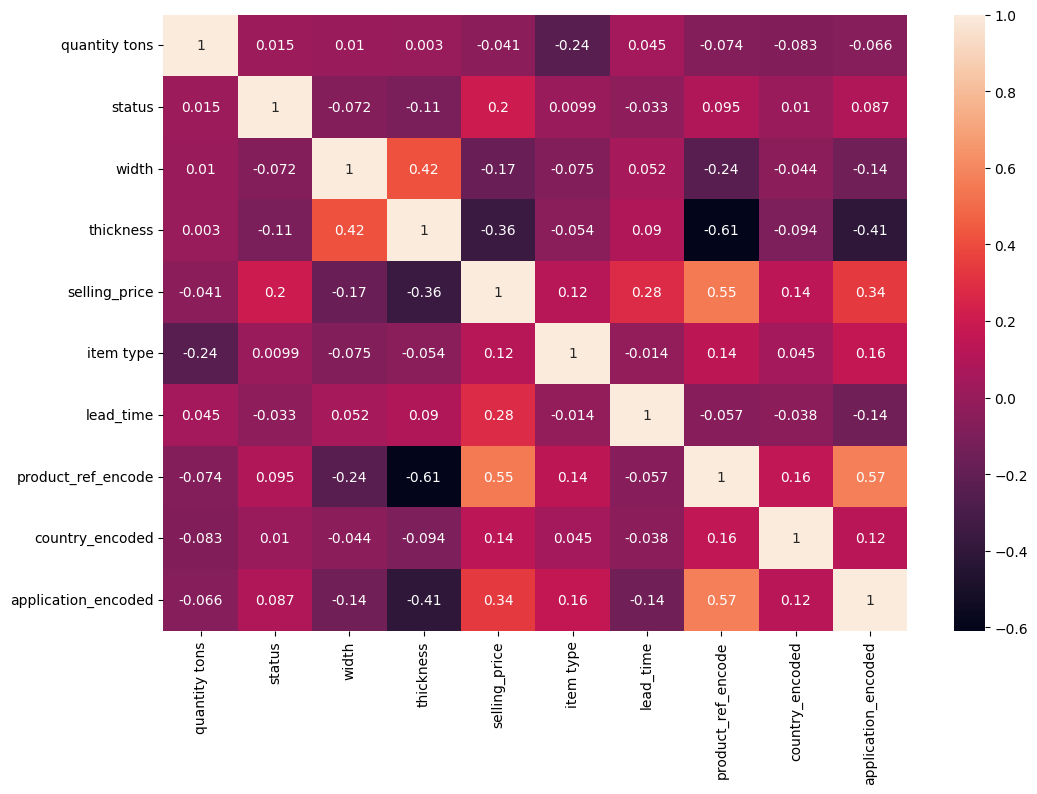

In [65]:
col = ['quantity tons','status','width','thickness','selling_price','item type','lead_time',"product_ref_encode","country_encoded","application_encoded"]
df_heatmap = df2[col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, annot=True)


In [66]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['lead_time'])
y = df2.loc[:, 'lead_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135909, 9), (45304, 9), (135909,), (45304,))

In [67]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5696411972495631

In [68]:
from sklearn.model_selection import cross_val_score

for depth in range(1,30):
  model = DecisionTreeRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.07839798425838351, Cross-ValScore: 0.07795807776109542
Depth - 2, TrainScore: 0.17472112047204857, Cross-ValScore: 0.1745739527920352
Depth - 3, TrainScore: 0.22471614583063704, Cross-ValScore: 0.22418282569359863
Depth - 4, TrainScore: 0.2718920145398823, Cross-ValScore: 0.27026976981538875
Depth - 5, TrainScore: 0.329130036211272, Cross-ValScore: 0.3288428452331086
Depth - 6, TrainScore: 0.38354036325749274, Cross-ValScore: 0.37992216204331763
Depth - 7, TrainScore: 0.4326421305214341, Cross-ValScore: 0.4248597324517956
Depth - 8, TrainScore: 0.4785474411157402, Cross-ValScore: 0.46491869359659804
Depth - 9, TrainScore: 0.5247325307578797, Cross-ValScore: 0.5005267847845101
Depth - 10, TrainScore: 0.5668445493565384, Cross-ValScore: 0.5328901429063259
Depth - 11, TrainScore: 0.6054823130468702, Cross-ValScore: 0.5568457693830531
Depth - 12, TrainScore: 0.6458935958006478, Cross-ValScore: 0.5796988174201632
Depth - 13, TrainScore: 0.6895585013597829, Cross-Val

In [69]:
model = DecisionTreeRegressor(random_state=42, max_depth=16)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
train_score 

0.8104216495604071

In [70]:
model.predict(df4)

array([  93.        ,   88.12903226,   88.12903226,    7.61538462,
          7.61538462,   24.27272727,    7.61538462,    9.6461039 ,
         49.08823529,   -7.        ,    9.6461039 ,   49.08823529,
          8.04347826,    9.6461039 ,   49.08823529,    9.6461039 ,
         80.36764706,  -48.        ,  102.66666667,    1.        ,
          1.        ,  102.66666667,   49.08823529,  102.66666667,
        102.66666667,    1.        ,  102.66666667,    9.6461039 ,
          9.6461039 ,    9.6461039 ,   35.        ,  112.55509642,
         96.44852941,   96.44852941,   -3.        ,  106.09878419,
         95.        ,   18.6       ,   18.6       ,   76.16134454,
         87.        ,   50.66666667,   -8.2173913 ,   18.6       ,
         -8.2173913 ,   -8.2173913 ,   -8.2173913 ,   18.6       ,
         18.6       ,   92.32227488,   -8.2173913 ,   -8.2173913 ,
         -8.2173913 ,   18.6       ,   29.11235955,   18.6       ,
         18.6       ,   18.6       ,   18.6       ,   18.6    

In [71]:
# Generate predictions
predictions = model.predict(df4)

# Convert predictions to a DataFrame
df_predictions = df4.copy()  # Copy the input DataFrame
df_predictions['lead_time'] = predictions  # Add predictions as a new column

# Display the resulting DataFrame
df_predictions


,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
1,151.443459,2,5,0.800,1210.0,1047.00,11,27,24,93.000000
5,151.443459,2,5,1.500,1265.0,983.00,11,27,24,88.129032
9,151.443459,2,5,1.500,1165.0,983.00,11,27,24,88.129032
16,75.124394,2,5,0.595,1265.0,1161.86,13,27,30,7.615385
20,71.366978,2,5,0.595,1265.0,1161.31,13,27,30,7.615385
...,...,...,...,...,...,...,...,...,...,...
151867,12.512431,2,1,2.000,1500.0,584.00,10,9,8,18.571429
151871,31.050578,2,1,3.000,1500.0,560.00,10,9,8,12.653846
151875,19.372303,2,1,6.450,1330.0,634.00,10,9,8,21.294118
151879,18.937869,2,1,6.450,1500.0,664.00,10,9,8,23.878378


In [72]:
df5 = pd.concat([df_predictions, df2], axis=0) 
df5

,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
1,151.443459,2,5,0.800,1210.0,1047.00,11,27,24,93.000000
5,151.443459,2,5,1.500,1265.0,983.00,11,27,24,88.129032
9,151.443459,2,5,1.500,1165.0,983.00,11,27,24,88.129032
16,75.124394,2,5,0.595,1265.0,1161.86,13,27,30,7.615385
20,71.366978,2,5,0.595,1265.0,1161.31,13,27,30,7.615385
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,2,5,0.960,1220.0,591.00,11,27,11,-1.000000
181669,151.443459,2,5,0.950,1500.0,589.00,11,27,11,-1.000000
181670,4.235594,2,5,0.710,1250.0,619.00,11,27,11,-1.000000
181671,30.365013,2,5,0.850,1250.0,601.00,11,27,11,-1.000000


               Feature  Importance
5        selling_price    0.245258
6      country_encoded    0.179260
7  application_encoded    0.152350
8   product_ref_encode    0.100704
1               status    0.090934
0        quantity tons    0.069448
2            item type    0.065050
3            thickness    0.059701
4                width    0.037295


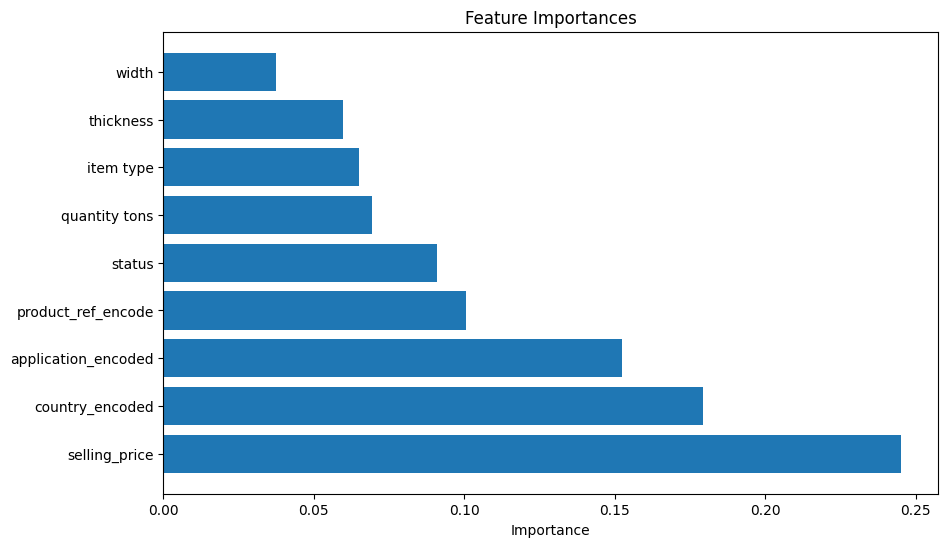

In [73]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [74]:
df5

,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
1,151.443459,2,5,0.800,1210.0,1047.00,11,27,24,93.000000
5,151.443459,2,5,1.500,1265.0,983.00,11,27,24,88.129032
9,151.443459,2,5,1.500,1165.0,983.00,11,27,24,88.129032
16,75.124394,2,5,0.595,1265.0,1161.86,13,27,30,7.615385
20,71.366978,2,5,0.595,1265.0,1161.31,13,27,30,7.615385
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,2,5,0.960,1220.0,591.00,11,27,11,-1.000000
181669,151.443459,2,5,0.950,1500.0,589.00,11,27,11,-1.000000
181670,4.235594,2,5,0.710,1250.0,619.00,11,27,11,-1.000000
181671,30.365013,2,5,0.850,1250.0,601.00,11,27,11,-1.000000


Build the Regression model for selling price
There is no corr b/w feature and target varible so we can't use lenear regression so will go for decision tree

In [75]:
from sklearn.model_selection import train_test_split

X = df5.drop(columns='selling_price')
y = df5.loc[:, 'selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136254, 9), (45419, 9), (136254,), (45419,))

In [76]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.8393140389444332

In [77]:
from sklearn.model_selection import cross_val_score

for depth in range(1,40):
  model = DecisionTreeRegressor(random_state=42,max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.25787268382409867, Cross-ValScore: 0.25777747345913626
Depth - 2, TrainScore: 0.4279422963331455, Cross-ValScore: 0.42784255307740854
Depth - 3, TrainScore: 0.5157992769288751, Cross-ValScore: 0.5156419880158373
Depth - 4, TrainScore: 0.5753420160478102, Cross-ValScore: 0.5751792087692074
Depth - 5, TrainScore: 0.6037854105934783, Cross-ValScore: 0.6033248630917113
Depth - 6, TrainScore: 0.6341629317564725, Cross-ValScore: 0.6330605297777266
Depth - 7, TrainScore: 0.6657226471324122, Cross-ValScore: 0.6639756788439356
Depth - 8, TrainScore: 0.6926107940108103, Cross-ValScore: 0.6895567546469383
Depth - 9, TrainScore: 0.7196260415859195, Cross-ValScore: 0.715182651502529
Depth - 10, TrainScore: 0.7443529791619979, Cross-ValScore: 0.7378545425833685
Depth - 11, TrainScore: 0.7675514296095264, Cross-ValScore: 0.7566061785165817
Depth - 12, TrainScore: 0.7926695418738036, Cross-ValScore: 0.7760250157445677
Depth - 13, TrainScore: 0.8178701050162878, Cross-ValScore:

In [78]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42, max_depth=21)

model.fit(X_train, y_train)

train_score =model.score(X_test, y_test)
cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
print(f"TrainScore: {train_score}, Cross-ValScore: {cross_val}")

TrainScore: 0.846939909338273, Cross-ValScore: 0.8422421418188307


In [79]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(max_depth = 3, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500, 1000]:
  model1 = RandomForestRegressor(n_estimators = n, max_depth = 3, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model1, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.5007475306204389
N: 20, Cross-Val Score: 0.5065417645226927
N: 50, Cross-Val Score: 0.5073480596288319
N: 100, Cross-Val Score: 0.5070927804508746
N: 200, Cross-Val Score: 0.5106853803598869
N: 500, Cross-Val Score: 0.5107371094581808
N: 1000, Cross-Val Score: 0.5105619625212408


In [80]:
model1 =  RandomForestRegressor(n_estimators = 1000, max_depth = 3, max_features = "sqrt")
model1.fit(X_train, y_train)
print(f"Test data accuracy : {model1.score(X_test, y_test)}")

Test data accuracy : 0.5090436136788281


In [81]:
from xgboost import  XGBRegressor

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5,0.7,0.71,0.711,0.712,0.713,0.714,0.72 ,1]:
  model =  XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.11475425528464975
Lambda: 0.002, Cross-Val Score: 0.20880200525884232
Lambda: 0.005, Cross-Val Score: 0.4031256791218313
Lambda: 0.006, Cross-Val Score: 0.44711727494094794
Lambda: 0.007, Cross-Val Score: 0.48411412978779556
Lambda: 0.008, Cross-Val Score: 0.5158155797052223
Lambda: 0.009, Cross-Val Score: 0.5427891520619472
Lambda: 0.01, Cross-Val Score: 0.5660141159085279
Lambda: 0.011, Cross-Val Score: 0.585712362620452
Lambda: 0.012, Cross-Val Score: 0.6027553913755975
Lambda: 0.013, Cross-Val Score: 0.6172595544337749
Lambda: 0.014, Cross-Val Score: 0.6295838015841216
Lambda: 0.015, Cross-Val Score: 0.6405227151079774
Lambda: 0.016, Cross-Val Score: 0.6498377644641015
Lambda: 0.017, Cross-Val Score: 0.6582793404141298
Lambda: 0.018, Cross-Val Score: 0.6655929110304367
Lambda: 0.019, Cross-Val Score: 0.6720365183499926
Lambda: 0.02, Cross-Val Score: 0.6780341443124464
Lambda: 0.05, Cross-Val Score: 0.7429253474931148
Lambda: 0.1, Cross-Val Score: 0

In [82]:
model = XGBRegressor(learning_rate = 0.7)
model.fit(X_train, y_train)
cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
print(f"Test data accuracy : {model.score(X_test, y_test)}, Cross-Val Score: {cross_score}")

Test data accuracy : 0.8450861135279694, Cross-Val Score: 0.8465080593214525


               Feature  Importance
7   product_ref_encode    0.384243
1               status    0.333362
8            lead_time    0.083470
5      country_encoded    0.058492
3            thickness    0.055780
2            item type    0.028318
6  application_encoded    0.027605
4                width    0.014663
0        quantity tons    0.014068


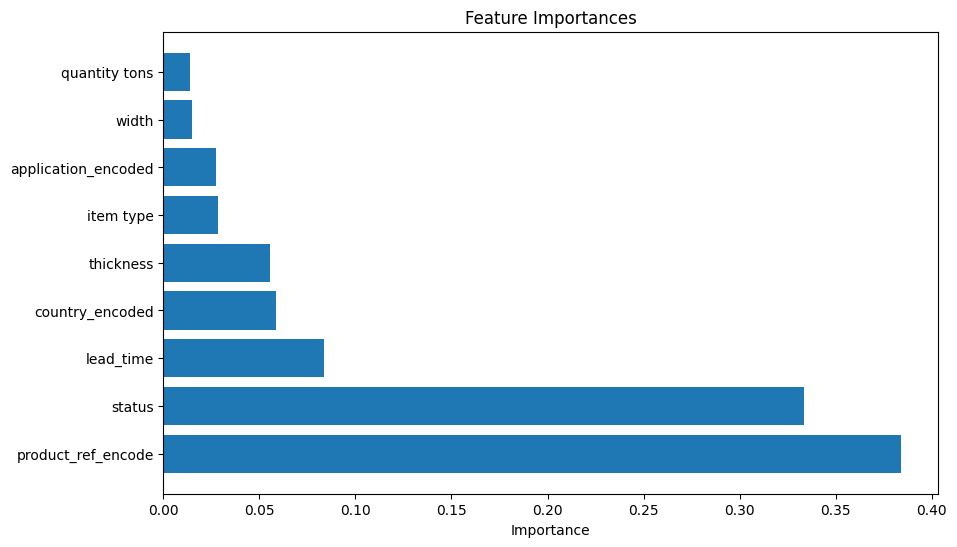

In [83]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [84]:
import pickle

# Save the trained model to a file
with open('trained_Regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [85]:
df5.describe()

,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
count,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000
mean,49.175605,2.001018,4.469492,2.245427,1297.045583,819.055571,8.518299,16.668597,13.954781,60.037956
std,47.991944,0.820613,0.837300,1.890707,248.961933,209.161210,2.919554,7.708315,11.262682,46.805661
min,0.000010,0.000000,0.000000,0.180000,700.000000,243.000000,0.000000,0.000000,0.000000,-689.000000
25%,10.971669,2.000000,4.000000,0.700000,1180.000000,669.000000,6.000000,15.000000,4.000000,28.000000
50%,30.365013,2.000000,5.000000,1.500000,1250.000000,812.000000,8.000000,15.000000,11.000000,60.000000
75%,67.160385,2.000000,5.000000,3.000000,1500.000000,953.000000,11.000000,27.000000,30.000000,97.000000
max,151.443459,8.000000,6.000000,6.450000,1980.000000,1379.000000,16.000000,29.000000,32.000000,448.000000


In [86]:
import pickle

# Save the trained model to a file
with open('df_Regression_model.pkl', 'wb') as file:
    pickle.dump(df5, file)

Classification for status

In [87]:
df_c = df5.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Lost':0, 'Won':1,]
df_c = df_c[(df_c.status == 1) | (df_c.status == 2)]
df_c['status'] = df_c['status'].map({1: 0, 2: 1})

In [88]:
df_c

,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
1,151.443459,1,5,0.800,1210.0,1047.00,11,27,24,93.000000
5,151.443459,1,5,1.500,1265.0,983.00,11,27,24,88.129032
9,151.443459,1,5,1.500,1165.0,983.00,11,27,24,88.129032
16,75.124394,1,5,0.595,1265.0,1161.86,13,27,30,7.615385
20,71.366978,1,5,0.595,1265.0,1161.31,13,27,30,7.615385
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,1,5,0.960,1220.0,591.00,11,27,11,-1.000000
181669,151.443459,1,5,0.950,1500.0,589.00,11,27,11,-1.000000
181670,4.235594,1,5,0.710,1250.0,619.00,11,27,11,-1.000000
181671,30.365013,1,5,0.850,1250.0,601.00,11,27,11,-1.000000


In [89]:
df_c["status"].value_counts()
df_c["status"].value_counts(normalize=True) * 100

status
1    77.110003
0    22.889997
Name: proportion, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split

X = df_c.drop(columns='status')
y = df_c.loc[:, 'status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112837, 9), (37613, 9), (112837,), (37613,))

In [91]:
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [92]:
y_train_smoteenn.value_counts(normalize=True)

status
0    0.554959
1    0.445041
Name: proportion, dtype: float64

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smoteenn, y_train_smoteenn)

f1_score(y_test, model.predict(X_test)), model.score(X_test, y_test)

(np.float64(0.9236278986480437), 0.8866083534948024)

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Loop through different depths to evaluate model performance
for depth in range(1, 40):  # Using range(1, 21) for depths 1 to 20
    model = DecisionTreeClassifier(max_depth=depth,random_state=42)  # Corrected class name
    model.fit(X_train_smoteenn, y_train_smoteenn)
    
    # Training score on the training set
    train_score = model.score(X_train_smoteenn, y_train_smoteenn)
    
    # Cross-validation score using 10-fold cross-validation
    cross_val = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv=10))
    
    # Print the results
    print(f"Depth - {depth}, TrainScore: {train_score:.4f}, Cross-ValScore: {cross_val:.4f}")


Depth - 1, TrainScore: 0.7318, Cross-ValScore: 0.7318
Depth - 2, TrainScore: 0.7405, Cross-ValScore: 0.7405
Depth - 3, TrainScore: 0.7799, Cross-ValScore: 0.7797
Depth - 4, TrainScore: 0.7895, Cross-ValScore: 0.7899
Depth - 5, TrainScore: 0.8108, Cross-ValScore: 0.8107
Depth - 6, TrainScore: 0.8220, Cross-ValScore: 0.8202
Depth - 7, TrainScore: 0.8424, Cross-ValScore: 0.8415
Depth - 8, TrainScore: 0.8643, Cross-ValScore: 0.8604
Depth - 9, TrainScore: 0.8844, Cross-ValScore: 0.8794
Depth - 10, TrainScore: 0.9007, Cross-ValScore: 0.8954
Depth - 11, TrainScore: 0.9179, Cross-ValScore: 0.9109
Depth - 12, TrainScore: 0.9341, Cross-ValScore: 0.9251
Depth - 13, TrainScore: 0.9453, Cross-ValScore: 0.9334
Depth - 14, TrainScore: 0.9552, Cross-ValScore: 0.9403
Depth - 15, TrainScore: 0.9631, Cross-ValScore: 0.9459
Depth - 16, TrainScore: 0.9703, Cross-ValScore: 0.9497
Depth - 17, TrainScore: 0.9761, Cross-ValScore: 0.9529
Depth - 18, TrainScore: 0.9807, Cross-ValScore: 0.9553
Depth - 19, TrainSc

In [95]:


# Train the DecisionTreeClassifier with the correct parameter
model = DecisionTreeClassifier(random_state=42, max_depth=29)  # Corrected to max_depth
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}")


F1 Score: 0.9229637603157517


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 3, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500, 1000]:
  model = RandomForestClassifier(n_estimators = n, max_depth = 3, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.792100969501907
N: 20, Cross-Val Score: 0.7983578772244172
N: 50, Cross-Val Score: 0.8037659705601843
N: 100, Cross-Val Score: 0.8018558979889304
N: 200, Cross-Val Score: 0.801380230224569


In [101]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 3, max_features = "sqrt")
model.fit(X_train_smoteenn, y_train_smoteenn)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.6677478531358839, F1-Score: 0.7442755120833248


In [102]:
from xgboost import XGBClassifier

for lamb in [0.001, 0.002, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.001, Cross-Val Score: 0.5549587261169966
Lambda: 0.002, Cross-Val Score: 0.7927302679497956
Lambda: 0.005, Cross-Val Score: 0.8419004099003334
Lambda: 0.006, Cross-Val Score: 0.8444105101281844
Lambda: 0.007, Cross-Val Score: 0.8457643653635717
Lambda: 0.008, Cross-Val Score: 0.8473670035801476
Lambda: 0.009, Cross-Val Score: 0.8497161101713724
Lambda: 0.01, Cross-Val Score: 0.8527384690627434
Lambda: 0.011, Cross-Val Score: 0.8556876450846665
Lambda: 0.012, Cross-Val Score: 0.8591564009491076
Lambda: 0.013, Cross-Val Score: 0.8631959875868794
Lambda: 0.014, Cross-Val Score: 0.8652889702019981
Lambda: 0.015, Cross-Val Score: 0.8667818416123175
Lambda: 0.016, Cross-Val Score: 0.8681795891099418
Lambda: 0.017, Cross-Val Score: 0.8703530591709792
Lambda: 0.018, Cross-Val Score: 0.8721240314835332
Lambda: 0.019, Cross-Val Score: 0.8734412851084542
Lambda: 0.02, Cross-Val Score: 0.8745390024430352
Lambda: 0.05, Cross-Val Score: 0.9027941351947014
Lambda: 0.1, Cross-Val Score: 0.92

In [103]:
model = XGBClassifier(learning_rate = 1)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.926488182277404, F1-Score: 0.9526873256788898


               Feature  Importance
1            item type    0.374286
5      country_encoded    0.136750
8            lead_time    0.109628
7   product_ref_encode    0.104941
6  application_encoded    0.092527
0        quantity tons    0.055138
2            thickness    0.051782
4        selling_price    0.046767
3                width    0.028180


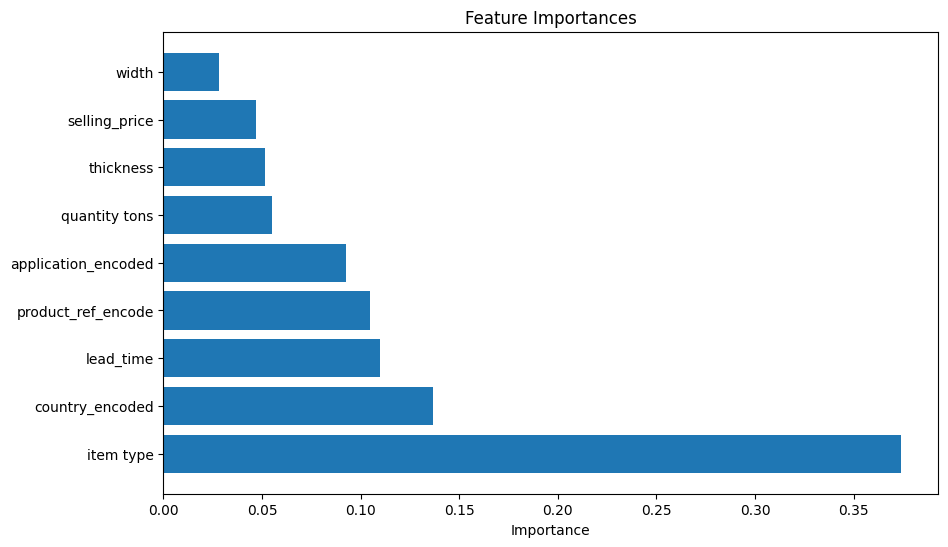

In [104]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [105]:
df5

,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
1,151.443459,2,5,0.800,1210.0,1047.00,11,27,24,93.000000
5,151.443459,2,5,1.500,1265.0,983.00,11,27,24,88.129032
9,151.443459,2,5,1.500,1165.0,983.00,11,27,24,88.129032
16,75.124394,2,5,0.595,1265.0,1161.86,13,27,30,7.615385
20,71.366978,2,5,0.595,1265.0,1161.31,13,27,30,7.615385
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,2,5,0.960,1220.0,591.00,11,27,11,-1.000000
181669,151.443459,2,5,0.950,1500.0,589.00,11,27,11,-1.000000
181670,4.235594,2,5,0.710,1250.0,619.00,11,27,11,-1.000000
181671,30.365013,2,5,0.850,1250.0,601.00,11,27,11,-1.000000


In [106]:
# Assuming you have trained your model and have original data in df_test and predictions

# 1. Predict values
predictions = model.predict(X_test)  # Replace `X_test` with the input DataFrame

# 2. Create a DataFrame with original and predicted values
df_comparison = X_test.copy()  # Copy the input features for context
df_comparison['Original'] = y_test.values  # Add the original target values
df_comparison['Predicted'] = predictions  # Add the predicted values

# Display the DataFrame
df_comparison


,quantity tons,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time,Original,Predicted
158149,64.752700,4,4.00,1134.0,714.00,7,15,11,18.0,1,1
119486,109.508888,4,1.11,1520.0,557.26,11,4,6,-20.0,1,1
156568,59.705120,4,6.45,1500.0,477.00,1,9,0,12.0,0,0
127505,56.971122,5,0.75,1185.0,921.30,8,27,30,-7.0,1,1
64655,22.823239,4,0.50,1250.0,1156.00,15,15,15,109.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
168933,4.777962,4,5.00,1500.0,574.00,7,9,8,72.0,0,0
74297,11.627370,5,1.50,1000.0,771.00,9,15,4,106.0,1,1
79191,83.540252,5,2.00,1250.0,762.00,7,2,4,111.0,1,1
37629,3.710017,5,3.00,1500.0,794.00,9,15,4,104.0,1,1


In [114]:
df_comparison.Predicted.value_counts()

Predicted
1    29335
0     8278
Name: count, dtype: int64

In [108]:
df5.describe() 

,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
count,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000
mean,49.175605,2.001018,4.469492,2.245427,1297.045583,819.055571,8.518299,16.668597,13.954781,60.037956
std,47.991944,0.820613,0.837300,1.890707,248.961933,209.161210,2.919554,7.708315,11.262682,46.805661
min,0.000010,0.000000,0.000000,0.180000,700.000000,243.000000,0.000000,0.000000,0.000000,-689.000000
25%,10.971669,2.000000,4.000000,0.700000,1180.000000,669.000000,6.000000,15.000000,4.000000,28.000000
50%,30.365013,2.000000,5.000000,1.500000,1250.000000,812.000000,8.000000,15.000000,11.000000,60.000000
75%,67.160385,2.000000,5.000000,3.000000,1500.000000,953.000000,11.000000,27.000000,30.000000,97.000000
max,151.443459,8.000000,6.000000,6.450000,1980.000000,1379.000000,16.000000,29.000000,32.000000,448.000000


In [109]:
import pickle
# Save the trained model to a file
with open('trained_classification_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [112]:
df5

,quantity tons,status,item type,thickness,width,selling_price,country_encoded,application_encoded,product_ref_encode,lead_time
1,151.443459,2,5,0.800,1210.0,1047.00,11,27,24,93.000000
5,151.443459,2,5,1.500,1265.0,983.00,11,27,24,88.129032
9,151.443459,2,5,1.500,1165.0,983.00,11,27,24,88.129032
16,75.124394,2,5,0.595,1265.0,1161.86,13,27,30,7.615385
20,71.366978,2,5,0.595,1265.0,1161.31,13,27,30,7.615385
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,2,5,0.960,1220.0,591.00,11,27,11,-1.000000
181669,151.443459,2,5,0.950,1500.0,589.00,11,27,11,-1.000000
181670,4.235594,2,5,0.710,1250.0,619.00,11,27,11,-1.000000
181671,30.365013,2,5,0.850,1250.0,601.00,11,27,11,-1.000000
